# Assignment #8


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Part I - PCA and t-SNE

Use both PCA and t-SNE to reduce the dimensionality of the breast cancer dataset to 3 dimensions, and plot the 
resulting data in 3-D.  Plot the positives and negatives using different markers, and indicate whether or not
the populations are clearly visually distinct for PCA and/or t-SNE.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


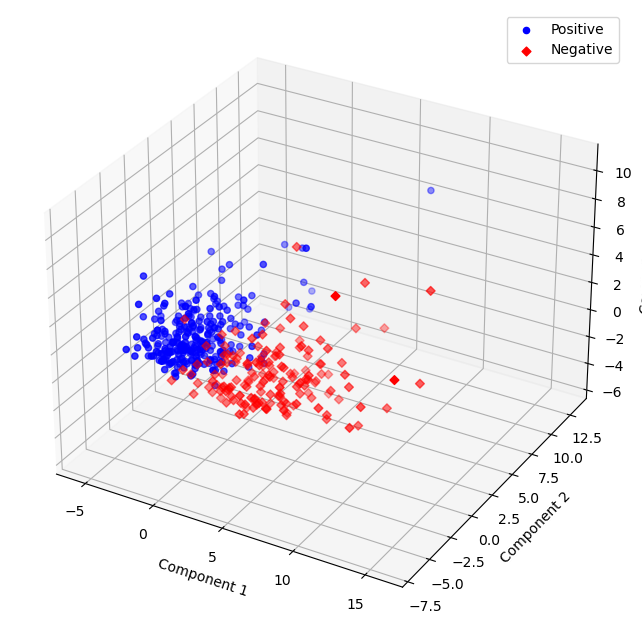

In [3]:
# PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# plot 3d
positive_samples = X_pca[y_train == 1]
negative_samples = X_pca[y_train == 0]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(positive_samples[:, 0], positive_samples[:, 1], positive_samples[:, 2],
    c='b', marker='o', label='Positive')
ax.scatter(negative_samples[:, 0], negative_samples[:, 1], negative_samples[:, 2],
    c='r', marker='D', label='Negative')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.show()


The differences are somewhat distinct, but there's definitely some overlap and meshing of the two categories. 

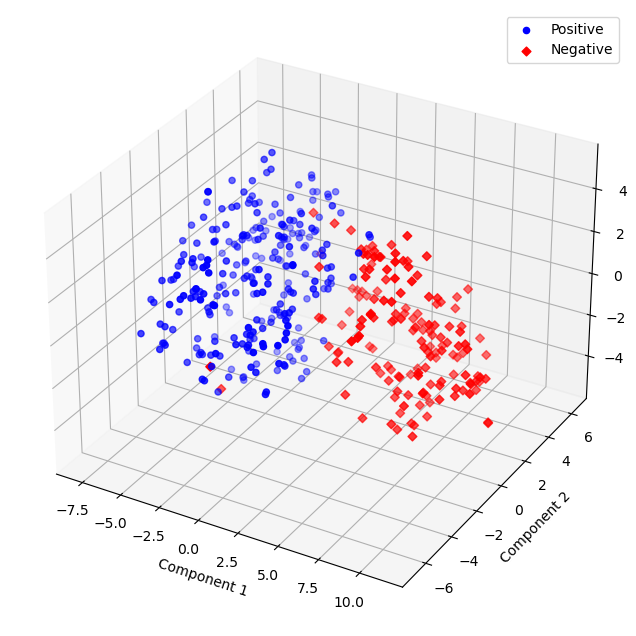

In [4]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)
positive_samples_tsne = X_tsne[y_train == 1]
negative_samples_tsne = X_tsne[y_train == 0]

# plot in 3d
fig_tsne = plt.figure(figsize=(8, 8))
ax_tsne = fig_tsne.add_subplot(111, projection='3d')
ax_tsne.scatter(positive_samples_tsne[:, 0], positive_samples_tsne[:, 1], positive_samples_tsne[:, 2],
                c='b', marker='o', label='Positive')
ax_tsne.scatter(negative_samples_tsne[:, 0], negative_samples_tsne[:, 1], negative_samples_tsne[:, 2],
                c='r', marker='D', label='Negative')
ax_tsne.set_xlabel('Component 1')
ax_tsne.set_ylabel('Component 2')
ax_tsne.set_zlabel('Component 3')
ax_tsne.legend()
plt.show()


The differences are much more distinct and pronounced when using t-SNE compared to PCA. There's very little overlap. 

# Part II - Clustering

In this problem you'll implement your own version of k-means clustering "from scratch", and then use the resulting clusters as a form of classifier, testing the performance of both against the moons dataset

In [5]:
import sklearn
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=0)

# and shuffle the data
X, y = sklearn.utils.shuffle(X,  y, random_state=0)
print(y)
# and do an 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[2 0 0 0 1 1 0 1 1 1 1 0 2 2 0 1 2 0 0 0 2 2 2 0 0 2 1 1 1 0 2 0 1 1 1 0 2
 0 2 2 2 2 1 2 1 2 2 0 0 2 2 0 1 0 2 2 2 2 0 1 2 0 0 1 0 0 0 2 2 0 1 1 0 0
 1 2 1 2 1 0 1 1 2 2 0 1 0 2 2 2 0 1 0 2 2 1 2 1 2 0 0 1 0 1 1 1 1 0 2 1 1
 1 0 1 0 2 2 2 0 1 1 1 2 1 2 1 1 1 0 1 1 2 2 0 1 2 2 1 2 1 2 1 0 1 2 0 1 2
 0 2 1 2 0 1 1 1 0 1 2 2 1 2 2 2 0 2 0 2 0 1 1 0 2 1 2 0 2 2 2 2 2 1 0 1 1
 0 0 2 0 0 2 1 1 1 1 1 1 2 2 0 2 0 2 2 0 2 0 1 0 0 0 0 2 0 0 2 1 0 1 0 2 2
 0 2 0 1 0 2 0 1 1 0 1 2 2 2 2 2 0 0 0 1 0 2 2 2 0 2 2 0 2 1 0 1 2 1 2 2 0
 1 1 2 2 0 1 0 2 0 1 1 0 0 0 0 1 2 2 0 0 2 1 1 2 0 2 1 0 2 0 2 0 2 2 2 0 0
 2 2 0 1 0 2 2 1 2 2 0 0 0 0 1 0 0 2 2 0 0 0 0 1 2 1 1 0 1 1 0 1 1 0 0 2 0
 2 1 0 0 1 2 1 2 0 0 2 1 2 2 1 1 1 2 2 0 2 1 0 2 0 2 0 1 1 2 0 0 2 1 1 0 2
 0 1 1 1 0 1 1 2 0 2 0 0 1 0 1 2 1 0 1 1 1 1 2 1 1 0 2 2 0 1 1 1 0 2 2 1 1
 1 2 0 0 2 1 1 1 0 2 0 2 2 1 1 1 0 1 2 0 2 1 2 2 1 1 2 2 0 2 0 1 0 1 0 0 0
 0 0 2 2 0 0 2 0 2 1 2 2 1 1 0 0 1 1 0 2 2 0 1 2 2 1 2 2 0 2 0 0 1 1 0 0 1
 2 2 2 2 2 1 0 0 1 2 1 2 

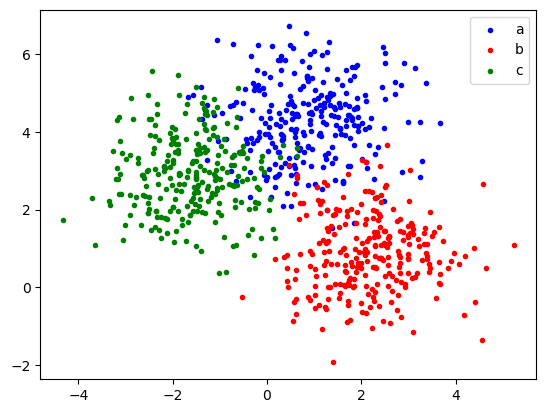

In [6]:
# Plot the data using different markers/colors for each class

a = X_train[y_train == 0]
b = X_train[y_train == 1]
c = X_train[y_train == 2]

plt.scatter(a[:,0], a[:,1], c='b', marker='.', label='a')
plt.scatter(b[:,0], b[:,1], c='r', marker='.', label='b')
plt.scatter(c[:,0], c[:,1], c='g', marker='.', label='c')
plt.legend()
plt.show()


In [7]:
# write a function that "from scratch" that will perform k-means clustering (do not use sklearn or some other package)
# the function will take in: 'X' - an array containing the training data, and 'k' - the number of clusters
# NOTE: the 'output_labels' should be in the form of a 1-D numpy array, containing integer labels corresponding to the 
# cluster each data point falls in
# NOTE: the label of each cluster will be arbitrary

import random

def subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def squared_distance(v, w):
    return sum_of_squares(subtract(v, w))

def num_differences(v1, v2):
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_sum(vectors):
    num_elements = len(vectors[0])
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def classify(k, X, means):
    return min(range(k), key=lambda i: squared_distance(X, means[i]))

def cluster_means(k, inputs, assignments):
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)
    return [vector_mean(cluster) if cluster else random.choice(inputs) for cluster in clusters]

def k_NN(k, X):
    # Start with random assignments
    output_labels = [random.randrange(k) for _ in X]
    for _ in range(10000):
        means = cluster_means(k, X, output_labels)
        new_assignments = [classify(k, input, means) for input in X]
        # Check how many assignments changed and if we're done
        num_changed = num_differences(output_labels, new_assignments)
        if num_changed == 0:
            return output_labels
        output_labels = new_assignments
        means = cluster_means(k, X, output_labels)

In [8]:
# now test the accuracy of the data in X_test, using the clustering function, and assigning each point in X_test
# to whichever cluster has the closest center to each datapoint
# NOTE: in order to do this, you'll have to establish what the correspondence is between the true labels (in y
# and y_test) and the arbitrary cluster labels

def assign(y, labels):
    label_mapping = {}

    for cluster_label in set(labels):
        cluster_indices = [i for i, label in enumerate(labels) if label == cluster_label]
        true_labels = [y[i] for i in cluster_indices]
        most_common_label = max(set(true_labels), key=true_labels.count)
        label_mapping[cluster_label] = most_common_label
    true_labels_assigned = [label_mapping[label] for label in labels]
    return true_labels_assigned

test_output_labels = k_NN(3, X_test)
true_labels_assigned = assign(y_test, test_output_labels)
accuracy = sum(1 for true_label, assigned_label in zip(y_test, true_labels_assigned) if true_label == assigned_label) / len(y_test)

print("Accuracy:", accuracy)

Accuracy: 0.875
